# CS933 Image & Video Analysis coursework 2023-2024, Part 3
> ID: 5556162, Name: Tien Yu Lin

## Module imports

In [1]:
import math

import cv2
import numpy as np
from lib.public import db, show_images_in_row
from matplotlib import pyplot as plt

## Read Board3-1

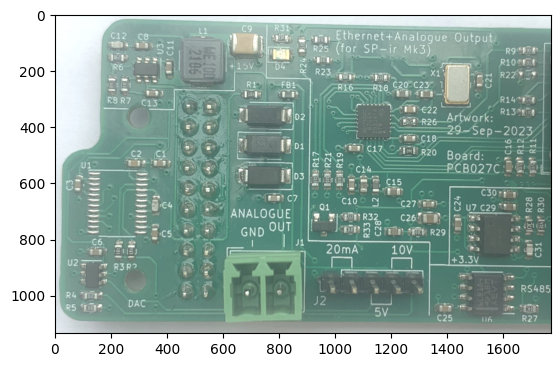

In [2]:
board = cv2.cvtColor(cv2.imread(f"{db.boards_dir}/Board3-1.jpg"), cv2.COLOR_BGR2RGB)[
    965:2100, 1000:2770
]

# Preprocess the image
# make it has higher contrast
board = cv2.convertScaleAbs(board, alpha=0.93, beta=65)

plt.imshow(board)
plt.show()

## Remove its green background

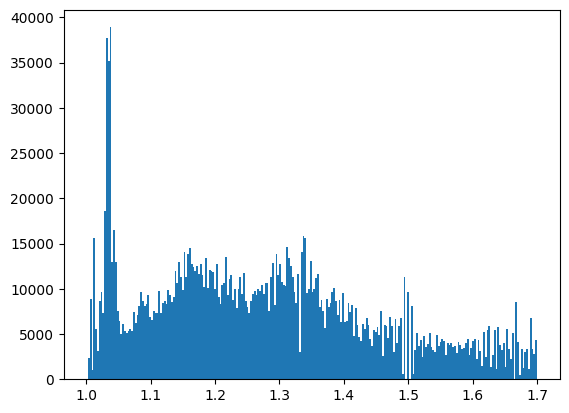

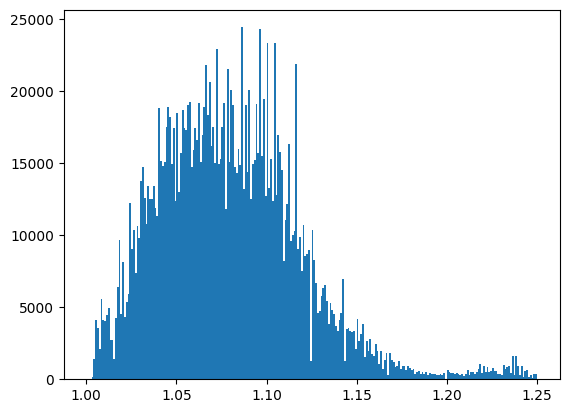

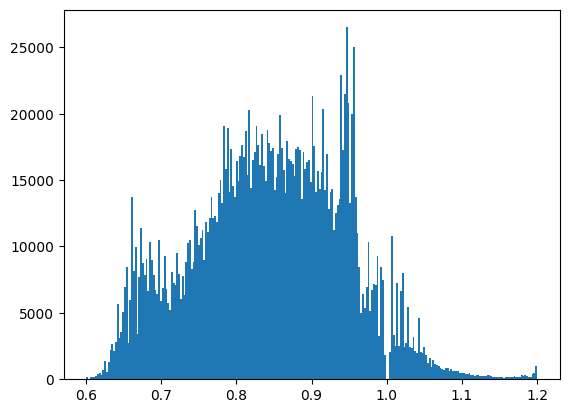

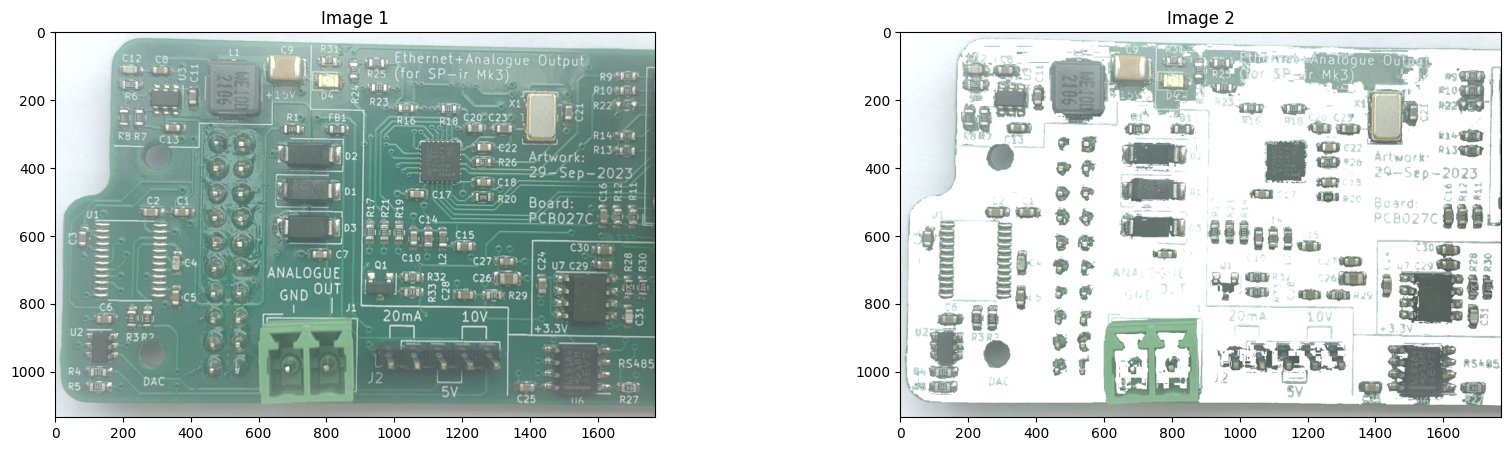

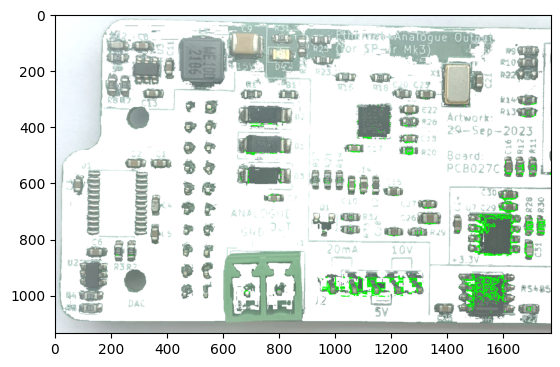

In [4]:
r_range = range(10, 70)
g_range = range(30, 140)
b_range = range(15, 130)

# Use image pyramid to subsample the image
# p_board = cv2.pyrMeanShiftFiltering(board, 10, 100, board, 2)

# plt.imshow(p_board)
# plt.show()

# Split image to RGB layers
r, g, b = cv2.split(board)

# Calculate the G and R ratio, then show the histogram
ratio_g_r = g / r
ratio_g_r = ratio_g_r[ratio_g_r != 1.0]
plt.hist(ratio_g_r.ravel(), bins=250, range=(1, 1.7))
plt.show()

# Calculate the G and B ratio, then show the histogram
ratio_g_b = g / b
ratio_g_b = ratio_g_b[ratio_g_b != 1.0]
plt.hist(ratio_g_b.ravel(), bins=250, range=(1, 1.25))
plt.show()

# Calculate the R and B ratio, then show the histogram
ratio_r_b = r / b
ratio_r_b = ratio_r_b[ratio_r_b != 1.0]
plt.hist(ratio_r_b.ravel(), bins=250, range=(0.6, 1.2))
plt.show()

no_green_board = board.copy()
no_green_board[
    (g / r > 1.02) &
    (g / b > 1.02) & 
    (r / b < 0.88)
] = [255, 255, 255]
show_images_in_row((board, no_green_board,))

cv2.imwrite(f"{db.boards_dir}/no_green_board.jpg", cv2.cvtColor(no_green_board, cv2.COLOR_RGB2BGR))

hsv = cv2.cvtColor(h := no_green_board.copy(), cv2.COLOR_BGR2HSV)

dark_green_lower = np.array([30, 0, 40])
dark_green_upper = np.array([80, 255, 100])

mask = cv2.inRange(hsv, dark_green_lower, dark_green_upper)
contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

for contour in contours:
    cv2.drawContours(h, [contour], -1, (0, 255, 0), 2)

plt.imshow(h, cmap="gray")
plt.show()